In [4]:
import tensorflow as tf
from matplotlib import pyplot as plt
from keras import layers, losses, optimizers, models, metrics
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("run.csv", names=["Completion", "Total", "InQuery", "Model", "VecHits","Query", "RAG","Similarity", "Mean","Std"])

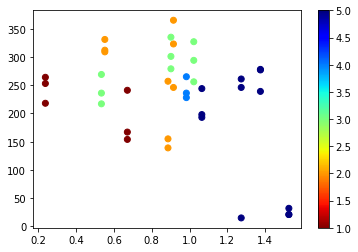

In [33]:
rag_rows = df[df["RAG"] == "RAG"]
non_rag_rows = df[df["RAG"] != "RAG"]

plt.scatter(np.array(rag_rows["Mean"]),np.array(rag_rows["Completion"]), c=np.array(rag_rows["VecHits"]),cmap="jet_r")
#plt.plot(np.array(rag_rows["Completion"]),np.array(rag_rows["Std"]),'.')
#plt.plot(np.array(rag_rows["VecHits"]),np.array(rag_rows["Mean"])-np.power(np.array(rag_rows["Std"]),2)/2,'.')
plt.colorbar()
plt.show()

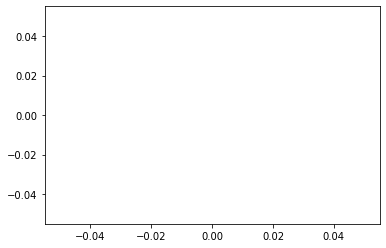

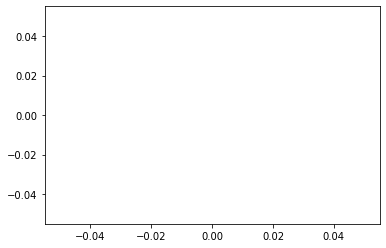

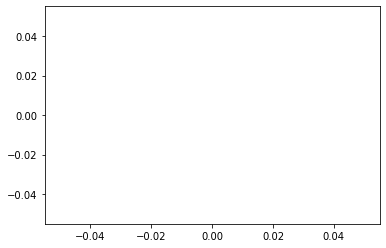

In [6]:
queries = set(df["Query"])
score = []
hits = []
rag_score = []
rag_hits = []
rag_ctoq = []
ctoq = []
for q in queries:
    rows = df[df["Query"]==q]

    rag_rows = rows[rows["RAG"] == "RAG"]
    non_rag_rows = rows[rows["RAG"] != "RAG"]
    


    # for r in rag_rows.iloc:
    #     rag_ctoq.append(r["Completion"])
        
    # for r in non_rag_rows.iloc:
    #     ctoq.append(r["Completion"])

    # rag_score.extend(rag_rows["Similarity"])
    # rag_hits.extend(rag_rows["VecHits"])

    # score.extend(non_rag_rows["Similarity"])
    # hits.extend(non_rag_rows["VecHits"])

plt.plot(rag_hits, rag_score, ".")
plt.show()

plt.plot(rag_ctoq,rag_score, ".")
plt.plot(ctoq,score, ".")
plt.show()

plt.plot(rag_hits,rag_ctoq, ".")
plt.show()